In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl
import pandas as pd

In [3]:
train_data_df = pd.read_csv('/content/drive/MyDrive/CV_Nose_Detection/training.csv')
test_data_df = pd.read_csv('/content/drive/MyDrive/CV_Nose_Detection/test.csv')


In [4]:
# Describing Data

train_data_df.head()
test_data_df.head()

pd.Series(train_data_df.columns)
pd.Series(test_data_df.columns)

print(train_data_df.info())
print(test_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [5]:
train_data_df[train_data_df['nose_tip_x'].isnull()]
train_data_df[train_data_df['nose_tip_y'].isnull()]


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image


In [6]:
################################################################
## Splitting data to train, test, and labels
################################################################

def process_data(data_df,train):
    if train:
        y=np.array(data_df.iloc[:,20:22])

    img_dt = []
    for i in range(len(data_df)):
        img_dt.append(data_df['Image'][i].split(' '))

    X=np.array(img_dt, dtype='float')
    return X,y if train else " "
X_train,y_train=process_data(train_data_df,True)
X_test_submit,_=process_data(test_data_df,False)


print(X_train)
print(y_train)
print(X_test_submit)


[[238. 236. 237. ...  70.  75.  90.]
 [219. 215. 204. ...   1.   1.   1.]
 [144. 142. 159. ...  78.  78.  77.]
 ...
 [ 74.  74.  74. ...  20.  20.  20.]
 [254. 254. 254. ... 254. 254. 254.]
 [ 53.  62.  67. ... 158. 158. 159.]]
[[44.42057143 57.06680301]
 [48.20629787 55.66093617]
 [47.55726316 53.53894737]
 ...
 [49.46257171 67.51516098]
 [50.75420235 66.72498824]
 [47.06925037 73.03333926]]
[[182. 183. 182. ...   8.   5.   5.]
 [ 76.  87.  81. ... 228. 211. 168.]
 [177. 176. 174. ...   1.   1.   1.]
 ...
 [ 28.  28.  29. ...  77.  78.  78.]
 [104.  95.  71. ... 144. 151. 159.]
 [ 63.  61.  64. ... 113. 112. 113.]]


In [7]:
X_train=X_train.reshape(X_train.shape[0],96,96)
X_test_submit=X_test_submit.reshape(X_test_submit.shape[0],96,96)

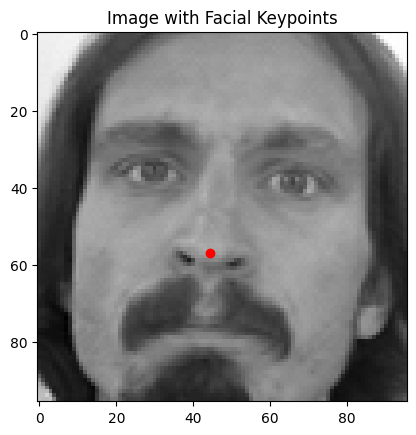

In [8]:
plt.imshow(X_train[0], cmap='gray')
plt.scatter(y_train[0][0], y_train[0][1], c='red', marker='o')
plt.title("Image with Facial Keypoints")
plt.show()

In [9]:
X_train=X_train/255.0
X_test_submit=X_test_submit/255.0


Final_X_train=X_train
Final_y_train=y_train

In [10]:
X_train=X_train/255.0
X_test_submit=X_test_submit/255.0


Final_X_train=X_train
Final_y_train=y_train

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=1)


train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

In [12]:
def model_arch(arch):
    model=(arch((96, 96, 1)))
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='mse',
                  metrics=['accuracy'])
    model.summary()
    history = model.fit(train_dataset,epochs=10,validation_data=test_dataset,batch_size=64,shuffle=True)
    return model


In [13]:
def model_architecture(input_shape):
  input_img = tf.keras.Input(shape=input_shape)

  layer=tfl.Conv2D(filters= 32 , kernel_size= 7,strides=(7, 7),padding='same')(input_img)
  layer=tfl.BatchNormalization(axis=3)(layer,training=True)
  layer=tfl.ReLU()(layer)
  layer=tfl.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(layer)

  layer=tfl.Conv2D(filters= 32 , kernel_size= 5 ,strides=(5, 5),padding='same')(layer)
  layer=tfl.BatchNormalization(axis=3)(layer,training=True)
  layer=tfl.ReLU()(layer)
  layer=tfl.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(layer)

  layer=tfl.Conv2D(filters= 16 , kernel_size= 3 ,strides=(3, 3), padding='same')(layer)
  layer=tfl.BatchNormalization(axis=3)(layer,training=True)
  layer=tfl.ReLU()(layer)
  layer=tfl.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(layer)

  layer=tfl.Flatten()(layer)

  layer=tfl.Dense(units=500, activation='relu')(layer)
  layer=tfl.Dropout(0.2)(layer)

  outputs=tfl.Dense(units= 2 , activation='linear')(layer)
  model = tf.keras.Model(inputs=input_img, outputs=outputs)
  return model

In [14]:
model4=model_arch(model_architecture)





Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        1600      
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 32)          25632 

In [15]:
predictions1 = model4.predict(X_test_submit)

56/56 [==============================] - 1s 11ms/step


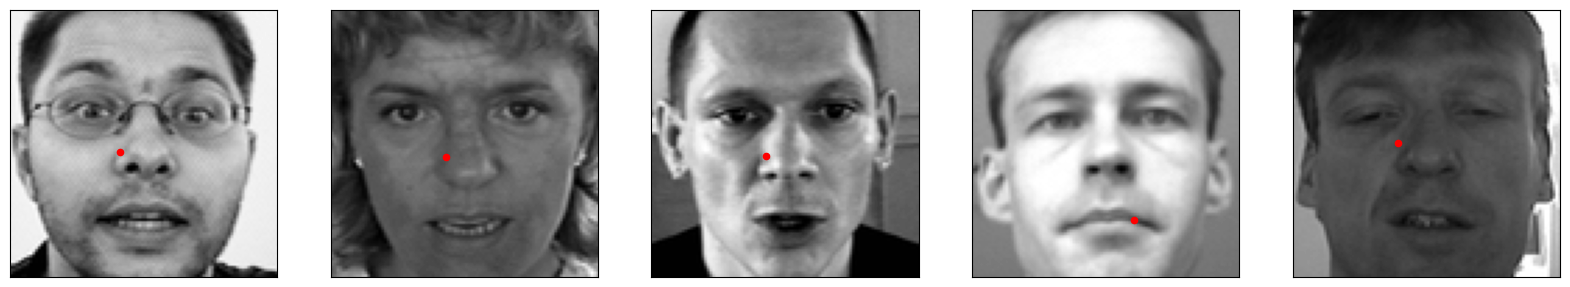

In [16]:
def plot_sample(image, keypoint, axis, title):
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0], keypoint[1], marker='o', s=20, color='r')
    plt.title(title)


fig = plt.figure(figsize=(20,16))
for i in range(5):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plot_sample(X_test_submit[i], predictions1[i], axis, "")

plt.savefig('plot_final.png', bbox_inches='tight')

plt.show()